# Scikit-learn practice

This notebook is dedicated to practice the concepts discussed in this folder.


In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

## End-to-end Scikit-learn classification workflow


### Getting dataset ready


In [2]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
heart_disease = pd.read_csv('../datasets/heart-disease.csv')

# Check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create features and target variables
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Visualizing different sizes of DF
X_train.size, X_test.size, y_train.size, y_test.size

(3146, 793, 242, 61)

In [6]:
# Visualizing different shapes of DF
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Preparing a machine learning model


In [7]:
# Instantiate the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

### Fitting a model and making predictions


In [8]:
# Fit the Random ForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Use the fitted model to make predictions on the test data and saving the predictions to a variable
y_preds = clf.predict(X_test)

### Evaluating a model's predictions


In [10]:
# Evaluating predictions with the score function on the training set
clf.score(X_train, y_train)

1.0

In [11]:
# Evaluating predictions with the score function on the test set
clf.score(X_test, y_test)

0.8524590163934426

### Experimenting with different classification models


In [12]:
# Importing models
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
# Creating model dict
model_dict = {
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
}

# Creating results dict
results = {}

In [14]:
# Looping through model_dict, fitting and scoring each model

## Setting random seed
np.random.seed(42)

for model_name, model in model_dict.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

{'SVC': 0.4918032786885246,
 'LinearSVC': 0.8688524590163934,
 'LogisticRegression': 0.8688524590163934,
 'KNeighborsClassifier': 0.5737704918032787,
 'RandomForestClassifier': 0.8524590163934426}

<Axes: >

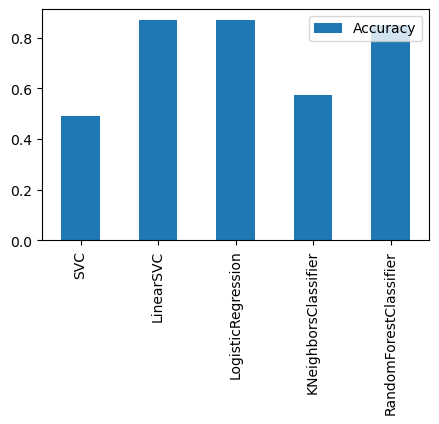

In [15]:
# Creating a pandas DF containing the results
results_df = pd.DataFrame(
    results.values(),
    results.keys(),
    columns=['Accuracy'],
)

# Creating bar plot from the df
results_df.plot.bar(figsize=(5, 3))

### Hyperparameter tuning


In [16]:
# Different LogisticRegression hyperparameters
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
}

In [17]:
# Creating RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Setting up random seed
np.random.seed(42)

# Setting up an instance of RandomizedSearchCV with a LogisticRegression estimator
rs_log_reg = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=5,
    verbose=2,
)

# Fitting the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [18]:
# Finding the best parameters of the RandomizedSearchCV
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [19]:
# Scoring the instance of RandomizedSearchCV
rs_log_reg.score(X_test, y_test)

0.8360655737704918

### Classifier Model Evaluation


In [20]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(
    solver='liblinear',
    C=0.23357214690901212,
)

# Fitting the new instance of LogisticRegression with the best hyperparameters on the training data
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [21]:
# Importing model evaluations
from sklearn.metrics import (
    RocCurveDisplay,
    ConfusionMatrixDisplay,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import cross_val_score

In [22]:
# Making predictions on test data
y_preds = clf.predict(X_test)

In [23]:
# Creating a confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[25,  6],
       [ 4, 26]])

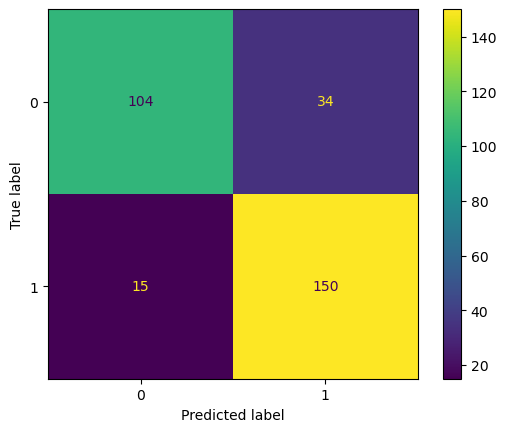

In [24]:
# Creating better confusion matrix
ConfusionMatrixDisplay.from_estimator(
    estimator=clf,
    X=X,
    y=y,
)

In [25]:
# Creating classification report function
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [26]:
# Finding precision score of model
precision_score(y_true=y_test, y_pred=y_preds)

0.8125

In [27]:
# Finding recall score
recall_score(y_true=y_test, y_pred=y_preds)

0.8666666666666667

In [28]:
# Finding f1 score
f1_score(y_true=y_test, y_pred=y_preds)

0.8387096774193549

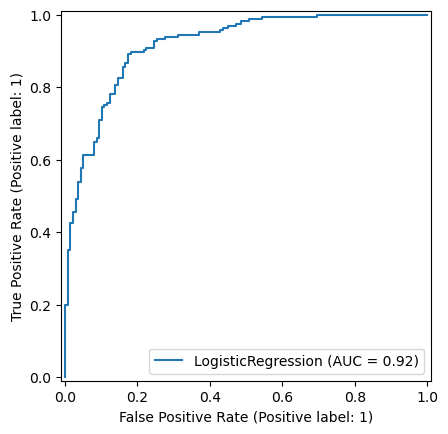

In [29]:
# Plotting RocCurve
RocCurveDisplay.from_estimator(estimator=clf, X=X, y=y)

In [30]:
# Finding the cross-validated precision
cross_val_precision = np.mean(
    cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring='precision')
)
cross_val_precision

0.8215873015873015

In [31]:
# Finding the cross-validated recall
cross_val_recall = np.mean(cross_val_score(estimator=clf, X=X, y=y, scoring='recall'))
cross_val_recall

0.9272727272727274

In [32]:
# Finding the cross-validated f1 score
cross_val_f1_score = np.mean(cross_val_score(estimator=clf, X=X, y=y, scoring='f1'))
cross_val_f1_score

0.8705403543192143

### Evaluating and importing a trained model


In [33]:
# Importing dump and load functions from joblib
from joblib import dump, load

In [34]:
# Using dump to export the trained model to file
dump(value=clf, filename='../models/practice_classification.joblib')

['../models/practice_classification.joblib']

In [35]:
# Using the load function to import the trained model
loaded_classification_model = load(filename='../models/practice_classification.joblib')

# Evaluating the loaded model on the test data
loaded_classification_model.score(X_test, y_test)

0.8360655737704918

## End-to-end Scikit-learn regression workflow


### Getting dataset ready


In [36]:
# Reading car sales data
car_sales = pd.read_csv('../datasets/car-sales-extended-missing-data.csv')

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
# Getting information on the CarSales Dataframe
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [38]:
# Finding missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Finding the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [40]:
# Removing rows with no labels
car_sales.dropna(subset=['Price'], inplace=True)

### Building a Pipeline


In [41]:
# Importing pipeline
from sklearn.pipeline import Pipeline

# Importing ColumnTransformer
from sklearn.compose import ColumnTransformer

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing SimpleImputer
from sklearn.impute import SimpleImputer

In [42]:
# Defining different categorical features
cat_features = ['Make', 'Colour']

# Defining Transformer
cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ]
)

In [43]:
# Defining door as a categorical feature
door_feature = ['Doors']

# Defining transformer
door_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=4)),
    ]
)

In [44]:
# Defining numeric features
num_features = ['Odometer (KM)']

# Creating transformer
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

In [45]:
# Creating single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('door', door_transformer, door_feature),
        ('num', num_transformer, num_features),
    ]
)

### Preparing machine learning models


In [46]:
# Importing models
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [57]:
# Creating dict with models
regression_models = {
    'Ridge': Ridge(),
    'SVR_rbf_kernel': SVR(kernel='rbf'),
    'SVR_linear_kernel': SVR(kernel='linear', max_iter=-1),
    'RandomForestRegressor': RandomForestRegressor(),
}

# Creating results dict
results_models = {}

### Preparing data


In [58]:
# Creating features and target
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [59]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

### Finding best model


In [60]:
# Looping through models dict and finding best one
for model_name, model in regression_models.items():
    model_pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model),
        ]
    )
    model_pipeline.fit(X_train, y_train)
    score = model_pipeline.score(X_test, y_test)
    results_models[model_name] = model_pipeline.score(X_test, y_test)

In [61]:
# Finding results
results_models

{'Ridge': 0.25387554878315,
 'SVR_rbf_kernel': 0.0018786027505235392,
 'SVR_linear_kernel': 0.07444538879413753,
 'RandomForestRegressor': 0.19752623756579668}

### Evaluating model


In [62]:
# Importing evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
# Creating a Ridge Pipeline
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())])

# Fitting the pipeline to the training data
ridge_pipeline.fit(X_train, y_train)

# Making predictions on the car sales dataset using the pipeline
car_y_preds = ridge_pipeline.predict(X_test)

# Viewing the first 50 predictions
car_y_preds[:50]

array([18515.50909062, 22204.2553879 , 11047.53630357,  6894.27134579,
        8795.32558662, 10929.54001986, 15268.7188806 , 13837.53187432,
       20208.38496415, 14377.94893894,  6218.07814158, 16543.03154019,
       11786.09157355, 13495.17509856, 14323.06047775, 16426.90461919,
       16001.94613096,  9927.08626267, 11578.87993636, 11582.10276812,
       10649.47261105, 13080.09250477, 17876.05869452, 23451.49602434,
       11798.26034157, 14482.70339352, 18431.83189003, 14682.66277883,
       20586.50324122, 19954.3828007 , 18164.00805254, 22367.20224046,
       12438.38759302, 14230.11057818, 18351.80022107, 19564.66460544,
       12215.36793479, 12481.1975504 , 18678.04204569, 11287.39004894,
       15279.49440485, 17380.59749049, 19248.65523566, 17345.43079543,
       15013.29011173, 12726.87553313, 12392.658628  ,  8477.08843716,
       15257.44206824, 18603.07734634])

In [67]:
# Finding the MSE
mse = mean_squared_error(y_true=y_test, y_pred=car_y_preds)
mse

49960264.205033995

In [68]:
# Finding the MAE
mae = mean_absolute_error(y_true=y_test, y_pred=car_y_preds)
mae

5714.468592363157

In [69]:
# Finding R^2 score
r2 = r2_score(y_true=y_test, y_pred=car_y_preds)
r2

0.25387554878315